<a href="https://colab.research.google.com/github/Shruti-Rani/LGMVIP-DataScience/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [54]:
members=pd.read_csv(r'/content/sample_data/members.csv.csv')
submission=pd.read_csv(r'/content/sample_data/sample_submission.csv',nrows=20000)
songs_info=pd.read_csv(r'/content/sample_data/song_extra_info.csv')
songs=pd.read_csv(r'/content/sample_data/songs.csv',nrows=20000)
train=pd.read_csv(r'/content/sample_data/train.csv',nrows=20000)
test=pd.read_csv(r'/content/sample_data/test.csv')

In [55]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


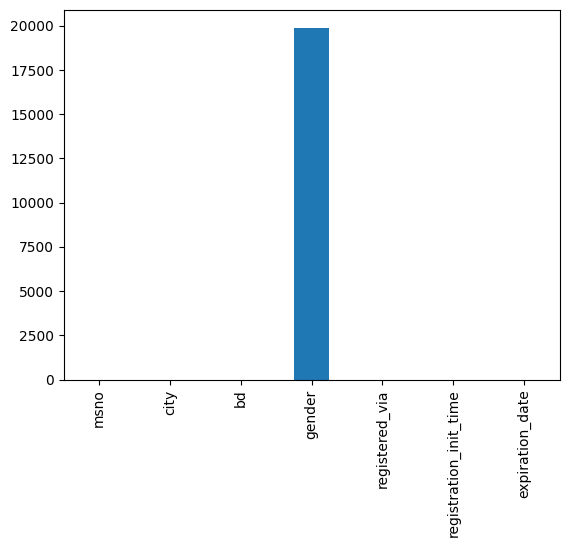

In [135]:
members.isnull().sum().plot.bar()
plt.show()

In [56]:
submission.head()

,id,target
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [57]:
songs_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [58]:
songs_info.isnull().sum()

song_id         0
name            2
isrc       136548
dtype: int64

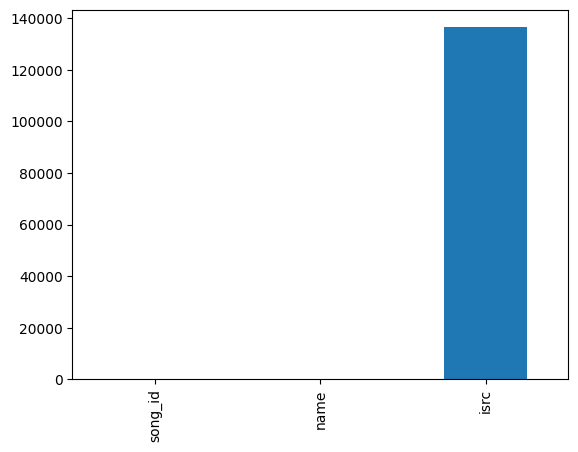

In [136]:
songs_info.isnull().sum().plot.bar()
plt.show()

In [59]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [60]:
songs.isnull().sum()

song_id            0
song_length        0
genre_ids        346
artist_name        0
composer        8382
lyricist       14332
language           0
dtype: int64

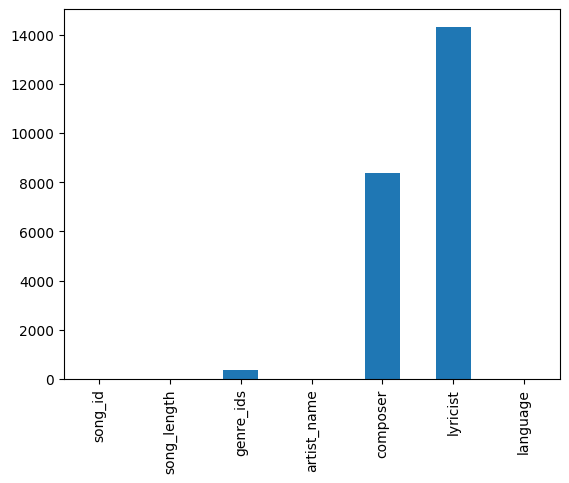

In [137]:
songs.isnull().sum().plot.bar()
plt.show()

In [61]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [62]:
train.isnull().sum()

msno                    0
song_id                 0
source_system_tab      67
source_screen_name    576
source_type            50
target                  0
dtype: int64

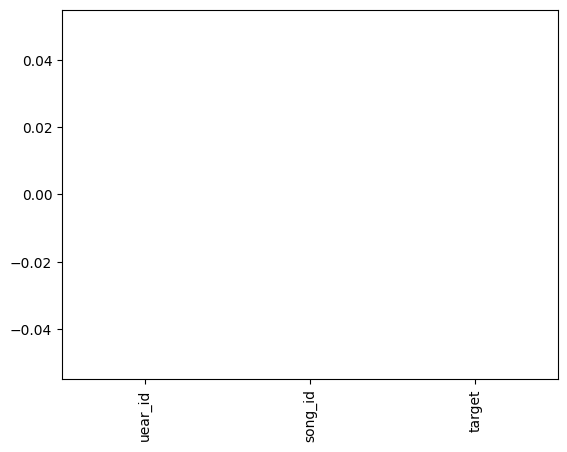

In [138]:
train.isnull().sum().plot.bar()
plt.show()

In [63]:
train=train.drop(['source_system_tab','source_screen_name','source_type'],axis=1)
train.head()

,msno,song_id,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,1


In [64]:
train.rename(columns={'msno':'uear_id'},inplace=True)
train.head()

,uear_id,song_id,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,1


In [65]:
train.shape

(20000, 3)

In [139]:
traning_set=train.merge(songs,on='song_id')


In [140]:
traning_set=traning_set.drop(['song_length','language'],axis=1)
traning_set.head()

,uear_id,song_id,target,genre_ids,artist_name,composer,lyricist
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,Desiigner,Sidney Selby| Adnan Khan,NaN
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,Desiigner,Sidney Selby| Adnan Khan,NaN
2,0LhkakIQDn36HZXI6ClQSO7W7jkpZAy+9MvYgPOZGrA=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩
3,MofmAMt7P8LIcF4+LLlcjyIhYUzmv13L/LRwYFxiGYE=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩
4,U9Z+N+szYGJHTPMn/C0V7yIyIC24fDI0RDRWChXATkg=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,0,458,莊心妍,鄭建浩,鄭建浩


In [141]:
traning_set=traning_set.merge(songs_info,on='song_id').drop('isrc',axis=1)
traning_set.head()

,uear_id,song_id,target,genre_ids,artist_name,composer,lyricist,name
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,Desiigner,Sidney Selby| Adnan Khan,NaN,Panda
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,Desiigner,Sidney Selby| Adnan Khan,NaN,Panda
2,0LhkakIQDn36HZXI6ClQSO7W7jkpZAy+9MvYgPOZGrA=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好
3,MofmAMt7P8LIcF4+LLlcjyIhYUzmv13L/LRwYFxiGYE=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好
4,U9Z+N+szYGJHTPMn/C0V7yIyIC24fDI0RDRWChXATkg=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,0,458,莊心妍,鄭建浩,鄭建浩,我過的很好


In [142]:
traning_set.rename(columns={'name':'song_name'},inplace=True)
traning_set.head()

,uear_id,song_id,target,genre_ids,artist_name,composer,lyricist,song_name
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,Desiigner,Sidney Selby| Adnan Khan,NaN,Panda
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,Desiigner,Sidney Selby| Adnan Khan,NaN,Panda
2,0LhkakIQDn36HZXI6ClQSO7W7jkpZAy+9MvYgPOZGrA=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好
3,MofmAMt7P8LIcF4+LLlcjyIhYUzmv13L/LRwYFxiGYE=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好
4,U9Z+N+szYGJHTPMn/C0V7yIyIC24fDI0RDRWChXATkg=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,0,458,莊心妍,鄭建浩,鄭建浩,我過的很好


In [143]:
traning_set['genre_ids'].value_counts()

465                    710
458                    400
444                     65
1609                    57
921                     49
359                     32
139                     24
2022                    21
1259                    20
2122                    13
437                      7
726                      7
451                      7
139|125|109              7
958                      6
786|947                  6
1011                     4
786                      4
465|1259                 4
947                      4
430                      3
921|465                  3
691                      3
829                      2
921|458                  2
698                      2
458|1287                 2
444|1259                 2
850                      2
465|829                  1
465|798                  1
1152                     1
880|458                  1
864|857|850|843          1
474                      1
423                      1
388                      1
8

In [144]:
traning_set['genre_ids']=traning_set['genre_ids'].str.replace('|',' ',regex=True)
traning_set['genre_ids'].value_counts()

465                    710
458                    400
444                     65
1609                    57
921                     49
359                     32
139                     24
2022                    21
1259                    20
2122                    13
437                      7
726                      7
451                      7
139 125 109              7
958                      6
786 947                  6
1011                     4
786                      4
465 1259                 4
947                      4
430                      3
921 465                  3
691                      3
829                      2
921 458                  2
698                      2
458 1287                 2
444 1259                 2
850                      2
465 829                  1
465 798                  1
1152                     1
880 458                  1
864 857 850 843          1
474                      1
423                      1
388                      1
8

In [145]:
traning_set['artist_name']=traning_set['artist_name'].str.replace('|',' ',regex=True)
traning_set['artist_name']=traning_set['artist_name'].str.replace('/',' ',regex=True)
traning_set['composer']=traning_set['composer'].str.replace('|',' ',regex=True)
traning_set['composer']=traning_set['composer'].str.replace('/',' ',regex=True)
traning_set['lyricist']=traning_set['lyricist'].str.replace('|',' ',regex=True)
traning_set['lyricist']=traning_set['lyricist'].str.replace('/',' ',regex=True)

In [146]:
traning_set['artist_name']=traning_set['artist_name'].str.lower()
traning_set['composer']=traning_set['composer'].str.lower()
traning_set['lyricist']=traning_set['lyricist'].str.lower()

In [147]:
traning_set['songs_details']=traning_set['artist_name']+''+traning_set['composer']+traning_set['lyricist']
traning_set.head()

,uear_id,song_id,target,genre_ids,artist_name,composer,lyricist,song_name,songs_details
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,desiigner,sidney selby adnan khan,NaN,Panda,NaN
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,desiigner,sidney selby adnan khan,NaN,Panda,NaN
2,0LhkakIQDn36HZXI6ClQSO7W7jkpZAy+9MvYgPOZGrA=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍鄭建浩鄭建浩
3,MofmAMt7P8LIcF4+LLlcjyIhYUzmv13L/LRwYFxiGYE=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍鄭建浩鄭建浩
4,U9Z+N+szYGJHTPMn/C0V7yIyIC24fDI0RDRWChXATkg=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,0,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍鄭建浩鄭建浩


In [148]:
traning_set.uear_id.value_counts()

EozJegFxTFIWDb9aJ7O8kSUHAgx4ZIvqf7IuN5Zck50=    19
V5U4EGk2kaSKaUGSwhU6g3HBefxflEvAy1vWPu6UBQs=    18
Bwg9yS76qujJJeKsYSzfJrMlkjK5Ui7KFkgUcjuXRCg=    12
W9NYSCff57nmfyYCiX6IbW0/G3YuwC18h/rld+BGxMY=    11
UzlQoa9tdrcpYdh4wksoh+SpWCFcKvRGPA+xLNqghmo=    11
                                                ..
rb7TT328utsdnd8COyhstig0zciXIURo7M464E60EHg=     1
hSn7jMfIURFu+1W3PDIDTxbhM5SxRg9VFRoH23Rm2Ic=     1
yrMfQXudhDaA/bOePZtkKErbjZc5pALG79FHPayEy5U=     1
iP3eF1In0rH61CfgVmWVYj4CgFcQQ0iVZG7MBA+Plgo=     1
j2Sx5B7BrjqCiT3ZwWK4AvepwM14QEalhTPi2/sgdG4=     1
Name: uear_id, Length: 975, dtype: int64

In [149]:
traning_set.duplicated().sum()

0

In [152]:
temp_traning_set=traning_set.copy()
temp_traning_set.head()

,uear_id,song_id,target,genre_ids,artist_name,composer,lyricist,song_name,songs_details
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,desiigner,sidney selby adnan khan,NaN,Panda,NaN
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,desiigner,sidney selby adnan khan,NaN,Panda,NaN
2,0LhkakIQDn36HZXI6ClQSO7W7jkpZAy+9MvYgPOZGrA=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍鄭建浩鄭建浩
3,MofmAMt7P8LIcF4+LLlcjyIhYUzmv13L/LRwYFxiGYE=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍鄭建浩鄭建浩
4,U9Z+N+szYGJHTPMn/C0V7yIyIC24fDI0RDRWChXATkg=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,0,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍鄭建浩鄭建浩


In [153]:
temp_traning_set.songs_details.duplicated().sum()

1178

In [154]:
temp_traning_set.shape

(1509, 9)

In [155]:
temp_traning_set.duplicated().sum()

0

In [156]:
temp_traning_set=temp_traning_set.drop('uear_id',axis=1)

In [157]:
temp_traning_set.head()

,song_id,target,genre_ids,artist_name,composer,lyricist,song_name,songs_details
0,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,desiigner,sidney selby adnan khan,NaN,Panda,NaN
1,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,desiigner,sidney selby adnan khan,NaN,Panda,NaN
2,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍鄭建浩鄭建浩
3,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍鄭建浩鄭建浩
4,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,0,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍鄭建浩鄭建浩


In [158]:
temp_traning_set.reset_index(inplace=True)

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(analyzer='word',stop_words='english')


In [159]:
temp_traning_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          1509 non-null   int64 
 1   song_id        1509 non-null   object
 2   target         1509 non-null   int64 
 3   genre_ids      1483 non-null   object
 4   artist_name    1509 non-null   object
 5   composer       1200 non-null   object
 6   lyricist       955 non-null    object
 7   song_name      1509 non-null   object
 8   songs_details  947 non-null    object
dtypes: int64(2), object(7)
memory usage: 106.2+ KB


In [160]:
tfidf_matrix=tfidf.fit_transform(temp_traning_set['songs_details'].values.astype('U'))

In [106]:
tfidf_matrix

<1509x1171 sparse matrix of type '<class 'numpy.float64'>'
	with 4959 stored elements in Compressed Sparse Row format>

In [107]:
temp_traning_set.shape

(1509, 9)

In [109]:
temp_traning_set.reset_index(drop=True,inplace=True)

In [110]:
from sklearn.metrics.pairwise import cosine_similarity

In [112]:
cosine_similarities=cosine_similarity(tfidf_matrix)
cosine_similarities

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [114]:
sorted(list(enumerate(cosine_similarities[0])),reverse=True,key=lambda x:x[1])[1:6]

[(1, 1.0), (136, 1.0), (137, 1.0), (138, 1.0), (139, 1.0)]

In [129]:
def recommend(song):
  song_index=temp_traning_set[temp_df['song_name']==song].index[0]
  distances=cosine_similarities[song_index]
  song_list=sorted(list(enumerate(cosine_similarities[0])),reverse=True,key=lambda x:x[1])[1:6]
  for i in song_list:
    print(i[0])

In [161]:
def recommend(song):
  song_index=temp_traning_set[temp_df['song_name']==song].index[0]
  distances=cosine_similarities[song_index]
  song_list=sorted(list(enumerate(cosine_similarities[0])),reverse=True,key=lambda x:x[1])[1:10]
  for i in song_list:
    print(temp_traning_set.iloc[i[0]].song_name)

In [131]:
recommend('Panda')

Panda
Gobaeghabnida
忠孝東路走九遍
忠孝東路走九遍
忠孝東路走九遍
你給我聽好
你給我聽好
你給我聽好
你給我聽好


In [132]:
recommend('我過的很好')

Panda
Gobaeghabnida
忠孝東路走九遍
忠孝東路走九遍
忠孝東路走九遍
你給我聽好
你給我聽好
你給我聽好
你給我聽好
